<a href="https://colab.research.google.com/github/Ruphai/UBS/blob/main/Bagging_and_Random_Forest_RufaiBalogun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bagging and Random Forests**

### Workspace utilities

In [ ]:
#conda install -c conda-forge scikit-learn, pandas 

In [ ]:
#conda install seaborn

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#%cd /content/drive/My\ Drive/

## Ex 1: Comparison between CART, Bagging and Random forests 

We work with the "Urban Land Cover" Machine learning data base (https://archive.ics.uci.edu/ml/datasets/Urban+Land+Cover). There are a test and a train set. These data sets are used for automated mapping of urban land cover (trees, grass, soil, concrete, asphalt, buildings, etc.) in satellite or aerial imagery. 9 types of urban land cover are considered and multi-scale spectral, size, shape, and texture information are use for classification. There are a low number of training samples for each class (14-30) and a high number of classification variables (148). The test set is from a random sampling of the image.

Before starting, we: 
 - load the data and look at them (display the dimension and some descriptive statistics) 
 - select the variables that we will use in the exercise, 


In [ ]:
# (1) Load the data and display the dimension and a brief statistics summary
import pandas as pd # data analysis
ulc_train = pd.read_csv("ULC_training.csv")
ulc_train.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [ ]:
ulc_train.sample(10)

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
31,shadow,1.39,220,0.86,49.89,1.43,1.79,61.68,40.14,47.87,...,18.27,2.30,0.80,0.65,7.53,1.49,0.79,0.20,160,1540.04
164,soil,1.92,141,1.24,215.19,2.02,2.02,212.28,216.28,217.00,...,18.91,3.49,0.88,0.67,7.88,1.44,0.82,0.06,990,824.01
101,asphalt,2.59,245,1.63,76.26,2.74,2.81,63.50,81.39,83.88,...,24.00,1.88,0.89,0.72,8.29,1.76,0.69,-0.01,726,722.17
22,concrete,2.09,178,1.63,215.76,2.40,2.66,188.69,229.03,229.55,...,18.81,3.36,0.87,0.40,7.93,0.78,0.96,-0.08,1912,799.26
12,building,1.30,1024,0.58,183.93,1.39,1.64,169.57,209.61,172.60,...,27.84,1.88,0.85,0.72,8.09,1.66,0.74,-0.08,372,1032.13
44,building,1.55,2306,0.74,211.82,1.29,1.71,185.81,232.73,216.93,...,13.86,2.86,0.74,0.90,6.91,1.91,0.73,-0.10,326,1508.99
166,grass,1.57,216,1.27,164.84,1.71,1.97,192.55,148.34,153.62,...,24.49,1.13,0.76,0.85,7.75,2.11,0.30,0.09,254,1580.72
77,grass,2.58,424,1.39,140.16,1.82,3.25,174.35,118.41,127.73,...,15.25,8.76,0.68,0.81,7.44,0.93,0.99,0.16,618,1875.76
51,tree,2.29,154,1.68,128.57,2.90,2.58,169.71,99.93,116.08,...,36.72,1.46,0.91,0.57,8.86,1.71,0.29,0.20,706,639.62
129,grass,2.03,679,1.03,138.63,1.84,2.46,158.69,128.27,128.95,...,13.50,4.21,0.72,0.87,7.39,1.44,0.91,0.09,322,1758.74


In [ ]:
print(ulc_train.shape)
print(ulc_train.describe())
print(ulc_train['class'].value_counts())

(168, 148)
          BrdIndx         Area       Round      Bright     Compact  \
count  168.000000   168.000000  168.000000  168.000000  168.000000   
mean     2.008512   565.869048    1.132976  165.569821    2.077679   
std      0.634807   679.852886    0.489150   61.883993    0.699600   
min      1.000000    10.000000    0.020000   37.670000    1.000000   
25%      1.537500   178.000000    0.787500  133.977500    1.547500   
50%      1.920000   315.000000    1.085000  164.485000    1.940000   
75%      2.375000   667.000000    1.410000  221.895000    2.460000   
max      4.190000  3659.000000    2.890000  244.740000    4.700000   

          ShpIndx      Mean_G      Mean_R    Mean_NIR        SD_G  ...  \
count  168.000000  168.000000  168.000000  168.000000  168.000000  ...   
mean     2.229881  161.577083  163.672440  171.459226   10.131369  ...   
std      0.703572   63.407201   71.306748   67.973969    5.179409  ...   
min      1.060000   30.680000   32.210000   40.120000    4.330

In [ ]:
ulc_test = pd.read_csv("ULC_testing.csv") 
ulc_test.head()
print(ulc_test.shape)

(507, 148)


In [ ]:
# (2) Select the variables that will be used 
target_column = "class" # The response variable that we will consider
features_columns = list(ulc_train)
features_columns.remove('class') # The predictors/features used to predict the target
print(target_column)
print('\n')
print(features_columns)

class


['BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'ShpIndx', 'Mean_G', 'Mean_R', 'Mean_NIR', 'SD_G', 'SD_R', 'SD_NIR', 'LW', 'GLCM1', 'Rect', 'GLCM2', 'Dens', 'Assym', 'NDVI', 'BordLngth', 'GLCM3', 'BrdIndx_40', 'Area_40', 'Round_40', 'Bright_40', 'Compact_40', 'ShpIndx_40', 'Mean_G_40', 'Mean_R_40', 'Mean_NIR_40', 'SD_G_40', 'SD_R_40', 'SD_NIR_40', 'LW_40', 'GLCM1_40', 'Rect_40', 'GLCM2_40', 'Dens_40', 'Assym_40', 'NDVI_40', 'BordLngth_40', 'GLCM3_40', 'BrdIndx_60', 'Area_60', 'Round_60', 'Bright_60', 'Compact_60', 'ShpIndx_60', 'Mean_G_60', 'Mean_R_60', 'Mean_NIR_60', 'SD_G_60', 'SD_R_60', 'SD_NIR_60', 'LW_60', 'GLCM1_60', 'Rect_60', 'GLCM2_60', 'Dens_60', 'Assym_60', 'NDVI_60', 'BordLngth_60', 'GLCM3_60', 'BrdIndx_80', 'Area_80', 'Round_80', 'Bright_80', 'Compact_80', 'ShpIndx_80', 'Mean_G_80', 'Mean_R_80', 'Mean_NIR_80', 'SD_G_80', 'SD_R_80', 'SD_NIR_80', 'LW_80', 'GLCM1_80', 'Rect_80', 'GLCM2_80', 'Dens_80', 'Assym_80', 'NDVI_80', 'BordLngth_80', 'GLCM3_80', 'BrdIndx_100',

In [ ]:
data, target = ulc_train[features_columns], ulc_train[target_column]
data_test, target_test = ulc_test[features_columns], ulc_test[target_column]

**Question 1. Fit a random forest on the training set to explain the type of soil (variable class) according to multi-scale spectral, size, shape, and texture information. You will use the values for $n\_estimatorsmax = 500 $ and $ max\_features= \sqrt(d)$ with $d$ denoting the number of features, $oob\_score=True$  and $random\_state=0$. Remember the meaning 
of $n\_estimators $ and $ max\_features$. Compute the oob score and explain. What does it represent ?**


In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##
## Help: 
## - import RandomForestClassifier from sklearn.ensemble
## - see the documentation about random forest classifier with scikit-learn : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Step 1: create the object rfc, it is a RandomForestClassifier object with n_estimators=500, max_features='auto' and random_state=0
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500, max_features = 'auto', oob_score = True, random_state = 0)

# Step 2: build the random forest on the train set by indicating the input data and the target variable 
rfc.fit(data, target)

# Step 3: look at the parameters used by your forest
from pprint import pprint
print('Parameters of the forest: \n')
pprint(rfc.get_params())
print('\n')


Parameters of the forest:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}




In [ ]:
# Step 4: print the oob_score (attributes of rfc named oob_score_)
print('Out of Bag Score: ')
pprint(rfc.oob_score_)

Out of Bag Score: 
0.8452380952380952


What does the Out of Bag Score mean? 
It is an estimate of the error rate that the trained model has for a new data drawn from the same distribution. 

???

The Out of Bag Score means the proportion of rightly classified target features based on the out-of-bag data samples used in building the model. A score of 

In this case, where we are provided with a classification task the OOB score represents the rate of correctly classified classes based on datasets that was not used in building the model. A high score of 0.845 

**Question 2. Predict the class of each observation of the test sample by using the random forest $\mathtt{rfc}$ and display the confusion matrix. Comment it. How many observations are misclassified ? Compute the accuracy.**

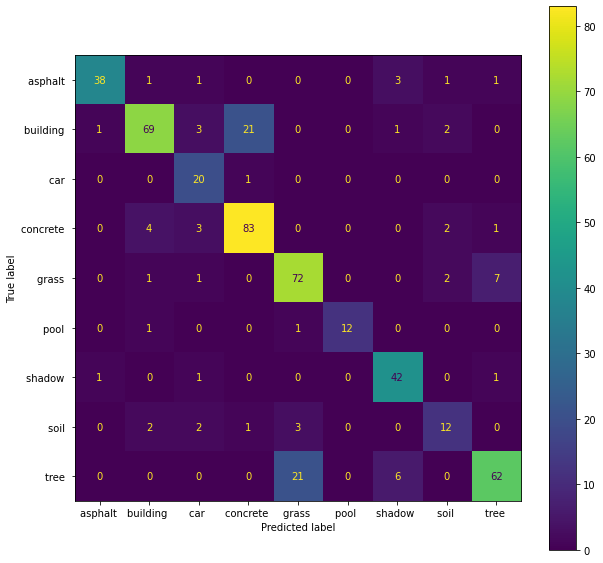

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##

# Step 1: compute the predictions
predictions_test = rfc.predict(data_test) 
#print(predictions_test)

# Step 2: display the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=target_test, y_pred=predictions_test) # define the confusion matrix object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_) # display the confusion matrix
#disp.plot()
fig, ax = plt.subplots(figsize = (10, 10)) 
disp.plot(ax=ax)
# Step 3: compute the accuracy
accuracy = rfc.score(X=data_test,y=target_test)

In [ ]:
print("Random Forest Accuracy is: \n", accuracy) 

Random Forest Accuracy is: 
 0.8086785009861933


In [ ]:
import numpy as np
y_test = np.asarray(target_test)
misclassified = np.where(y_test != predictions_test)
np.asarray(misclassified).shape[1]

97

The overall accuracy of our model is about 81%, with a about 97 target classes misclassified, most of which are grass and concrete soil class

We will now focus on the calibration of some RF parameters: $n\_estimators$ and $max\_features$. To calibrate these parameters, we will used the OOB errors.


**Question 3.  The code below shows how the OOB error can be measured at the addition of each new tree during training. The resulting plot can be used to approximate a suitable value of $n\_estimators$ at which the OOB error stabilizes. Comment this plot. What value for $n\_estimators$ does it seem suitable ?**

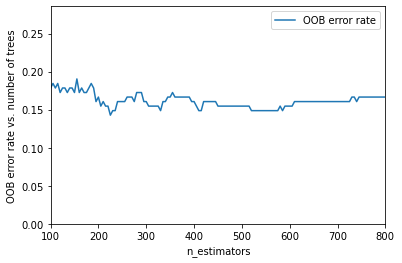

In [ ]:
import matplotlib.pyplot as plt

RANDOM_STATE = 0

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = []

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 800
step=5

for i in range(min_estimators, max_estimators+1, step):
    rf = RandomForestClassifier(warm_start=True, n_estimators=i, max_features='auto',random_state=RANDOM_STATE, oob_score=True)
    rf.fit(data, target)

    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - rf.oob_score_
    error_rate.append(oob_error)
  

# Plot Generate the "OOB error rate" vs. "n_estimators" plot

plt.plot(range(min_estimators, max_estimators +1, step), error_rate, label="OOB error rate")

plt.ylim(0, 1.5*max(error_rate)) 
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate vs. number of trees")
plt.legend(loc="upper right")
plt.show()


In [ ]:
##----- You can write your answer here or on a paper as well-----##
# What value of n_estimators
## COMMENT

'''

The n_estimators, signifying the number of trees in our model is selected based on the stability of the OOB error. 
In the Random Forest Classifier, we have built above, we can conclude that the model stabilizes when the number 
trees is about 500. Hence, we can reconfigure our model by selecting a model with n_estimators >= 500. 
Since we realize that the model complexity also increases with the number of trees in our model, we expect that
a model with this number of trees should capture the complexity in our data. 

'''

'\n\nThe n_estimators, signifying the number of trees in our model is selected based on the stability of the OOB error. \nIn the Random Forest Classifier, we have built above, we can conclude that the model stabilizes when the number \ntrees is about 500. Hence, we can reconfigure our model by selecting a model with n_estimators >= 500. \nSince we realize that the model complexity also increases with the number of trees in our model, we expect that\na model with this number of trees should capture the complexity in our data. \n\n'

**Question 4. Now, we will repeat 10 times a 3-fold cross validation with the function GridSearchCV to calibrate at the same time the parameters $n\_estimators$ and $max\_features$. The Comment the result and next build a forest using the best values for the parameters $n\_estimators$ and $max\_features$. Compute the accuracy on the test set and display the confusion matrix. Compare the performance of this forest with the previous one.**

In [ ]:
# Step 1: create a grid with all the values that we will considers for the two paramters
grid = {
    'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'n_estimators':[200,400,600,800]
}

# Step 2: use the grid to to search for the best couple of parameters
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier() # create the forest model to tune

B=10
results_cv=pd.DataFrame()
for i in range(B):
    rf_cv = GridSearchCV(estimator=rf,param_grid=grid, cv=3,n_jobs=-1)# Search the best values for the parameters using 3-fold cross validation, and use all available cores(n_jobs=-1)
    rf_cv.fit(data, target) # Fit the CV search
    if i==0: 
        results_cv=pd.DataFrame(rf_cv.cv_results_)[["params","mean_test_score","std_test_score"]]
    else:
        results_cv["mean_test_score"]=results_cv["mean_test_score"]+pd.DataFrame(rf_cv.cv_results_)["mean_test_score"]
        results_cv["std_test_score"]=results_cv["std_test_score"]+pd.DataFrame(rf_cv.cv_results_)["std_test_score"]  
        
        

results_cv["mean_test_score"]=results_cv["mean_test_score"]/B
results_cv["std_test_score"]=results_cv["std_test_score"]/B 


# Step 3: get the best parameters (with the higher performance)
ind_best=results_cv["mean_test_score"].idxmax()
print(results_cv["params"].iloc[ind_best])
print(results_cv["mean_test_score"].iloc[ind_best])
print(results_cv["std_test_score"].iloc[ind_best])
print(results_cv)


{'max_features': 0.1, 'n_estimators': 800}
0.8392857142857142
0.03564844920362288
                                        params  mean_test_score  \
0   {'max_features': 0.1, 'n_estimators': 200}         0.834524   
1   {'max_features': 0.1, 'n_estimators': 400}         0.832143   
2   {'max_features': 0.1, 'n_estimators': 600}         0.838095   
3   {'max_features': 0.1, 'n_estimators': 800}         0.839286   
4   {'max_features': 0.2, 'n_estimators': 200}         0.830952   
5   {'max_features': 0.2, 'n_estimators': 400}         0.832738   
6   {'max_features': 0.2, 'n_estimators': 600}         0.833929   
7   {'max_features': 0.2, 'n_estimators': 800}         0.830952   
8   {'max_features': 0.3, 'n_estimators': 200}         0.827381   
9   {'max_features': 0.3, 'n_estimators': 400}         0.827976   
10  {'max_features': 0.3, 'n_estimators': 600}         0.832143   
11  {'max_features': 0.3, 'n_estimators': 800}         0.831548   
12  {'max_features': 0.4, 'n_estimators': 200} 

**Question 5. Build a forest using the best values for the parameters $n\_estimators$ and $max\_features$. Compute the accuracy on the test set and display the confusion matrix. Compare the performance of this forest with the previous one.**

0.814595660749507


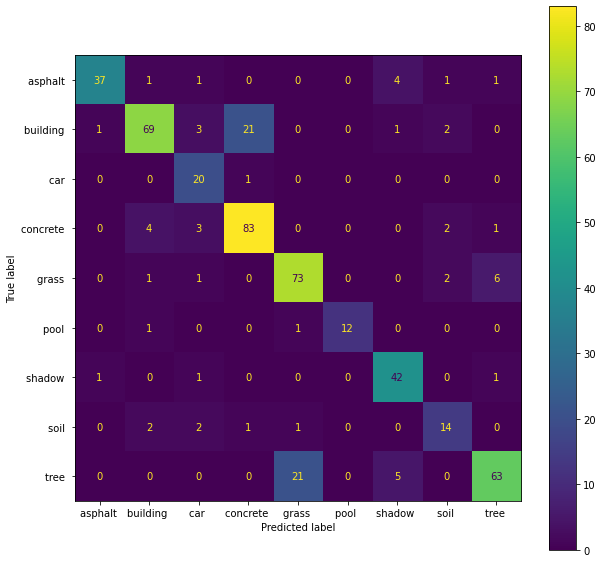

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##

# Step 1: fit a random forest with the best values for parameters
best_rfc = RandomForestClassifier(n_estimators=800, max_features=0.1,oob_score=True,random_state=0)

# Step 2: build the random forest on the train set by indicating the input data and the target variable 
best_rfc.fit(data, target)

# Step 3: compute the accuracy and the confusion matrix
predictions_test_2 = best_rfc.predict(data_test) 
cm_2 = confusion_matrix(target_test, predictions_test_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=best_rfc.classes_)
fig, ax = plt.subplots(figsize = (10, 10)) 
disp.plot(ax = ax) 

# Step 4: compute the accuracy
accuracy_2 = best_rfc.score(X=data_test, y=target_test)
print(accuracy_2)

In [ ]:
print("Accuracy of first Random Forest is: ", accuracy)

print("Accuracy of second Random Forest is: ", accuracy_2)

Accuracy of first Random Forest is:  0.8086785009861933
Accuracy of second Random Forest is:  0.814595660749507


In [ ]:
# Number of misclassified elements
y_test_2 = np.asarray(target_test)
misclassified = np.where(y_test_2 != predictions_test_2)
np.asarray(misclassified).shape[1]

94

After tuning our model by adjusting the hyperparameters using a blend of Cross Validation and OOB Score, we set the number of trees to 800 and the proportion of features to consider when splitting each node (max_feature) to 0.1.After building a Random Forest Classifier with these hyperparameters, the model performance improved by roughly 1% and the number of misclassified classes by reduced by 3. 


**Question 6. what value for $max\_features$ we have to use if we want to apply the bagging algorithm ? Build this model and compute the prediction error of this model based on the test set. Compare this model with the two previous random forests. We will call this model $bag$.**

In [ ]:
##----- You can write your answer here or on a paper as well-----##
## COMMENT

"""
To set our Random Forest to be a Bagging Model, we need our features to be drawn without replacement at each node. 
Hence, we draw the max feature, which would be set to 1.

max_feature = 1

"""

'\nTo set our Random Forest to be a Bagging Model, we need our features to be drawn without replacement at each node. \nHence, we draw the max feature, which would be set to 1.\n\nmax_feature = 1\n\n'

0.7830374753451677


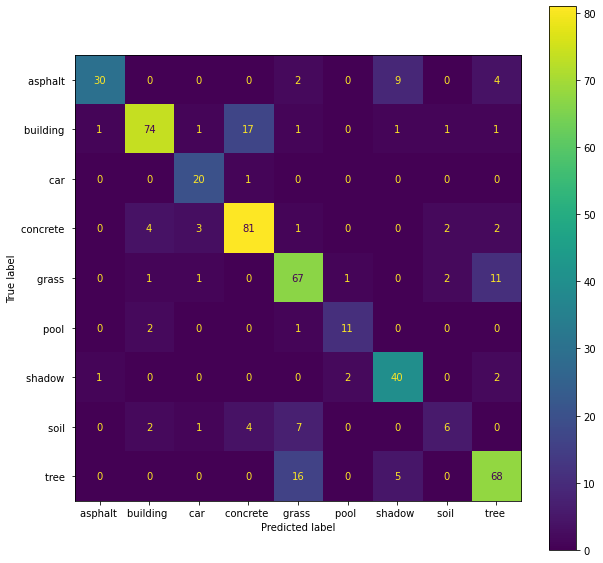

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##

# Step 1: fit a a bagging model (use the best value for n_estimators)
bag = RandomForestClassifier(n_estimators= 600, max_features=1,oob_score=True,random_state=0)

# Step 2: build the random forest on the train set by indicating the input data and the target variable 
bag.fit(data, target)

# Step 3: compute the accuracy and the confusion matrix
predictions_test_bag = bag.predict(data_test) 
cm_bag = confusion_matrix(target_test, predictions_test_bag)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bag,display_labels=bag.classes_)
fig, ax = plt.subplots(figsize = (10, 10)) 
disp.plot(ax = ax) 

# Step 4: compute the accuracy
accuracy_bag = bag.score(X=data_test, y= target_test)
print(accuracy_bag)


In [ ]:
y_test_bag = np.asarray(target_test)
misclassified = np.where(y_test_bag != predictions_test_bag)
np.asarray(misclassified).shape[1]

110

**COMMENT**

Max feature is set to 1, since we need our features to be drawn without replacement at each node. 
As shown above, this perform worst than a Random Forest Classifier using the Out-of-Bag Bootstrapping 
method. The full-bag, called the Bagging Classifier, in this case, build the ensembles of trees using 
the whole feature at each node. Isn't this aggregating the same tree n number of times? Are there still
elements of randomness in the bootstrapping of features used for each weak model in the ensemble tree? 


Bagging == Bootstrap Aggregation
https://medium.com/analytics-vidhya/ensemble-methods-bagging-boosting-and-stacking-28d006708731



**Question 7. Fit a maximal CART tree on the training set. Compute the prediction error of this tree based on the test set. name this tree $single\_tree$.**

*Indication: to get the maximal tree, use max_depth=None (the default value).*

0.717948717948718


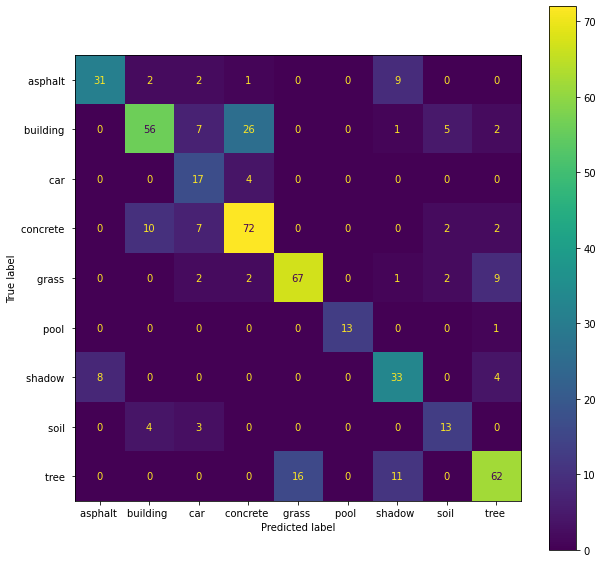

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##
## Help: see TP1

# Step 1: Fit the maximum tree with random_state=0
from sklearn.tree import DecisionTreeClassifier, plot_tree
single_tree = DecisionTreeClassifier(random_state=0)

# Step 2: build the tree on the train set by indicating the input data and the target variable 
single_tree.fit(data, target)

# Step 3: compute the accuracy and the confusion matrix
predictions_test_tree = single_tree.predict(data_test)
cm_tree = confusion_matrix(target_test, predictions_test_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=single_tree.classes_)
fig, ax = plt.subplots(figsize = (10, 10)) 
disp.plot(ax = ax) 

# ste 4: compute the accuracy on the test set
accuracy_tree = single_tree.score(data_test, target_test)
print(accuracy_tree)


In [ ]:
y_test_sing = np.asarray(target_test)
misclassified = np.where(y_test_bag != predictions_test_tree)
np.asarray(misclassified).shape[1]

143

In [ ]:
## Solution
print(single_tree.tree_.node_count);
print(single_tree.tree_.children_left)
print(single_tree.tree_.children_right)
print(single_tree.tree_.impurity)
print(single_tree.tree_.threshold)
# Avoir toutes la meilleure coupure pour chaque variable possible ?

35
[ 1  2 -1  4  5 -1  7 -1 -1 10 11 12 -1 -1 15 16 17 -1 -1 -1 21 -1 -1 -1
 25 26 -1 -1 29 30 -1 32 -1 -1 -1]
[24  3 -1  9  6 -1  8 -1 -1 23 14 13 -1 -1 20 19 18 -1 -1 -1 22 -1 -1 -1
 28 27 -1 -1 34 31 -1 33 -1 -1 -1]
[0.8801729  0.84536862 0.         0.818      0.48611111 0.
 0.16528926 0.         0.         0.73614958 0.6509003  0.1472
 0.         0.         0.54475309 0.24380165 0.44444444 0.
 0.         0.         0.24489796 0.         0.         0.
 0.59522962 0.42       0.         0.         0.22038567 0.1207076
 0.         0.44444444 0.         0.         0.        ]
[ 5.49999997e-02 -1.90000005e-01 -2.00000000e+00  9.85349998e+01
 -9.50000025e-02 -2.00000000e+00  4.45000008e-01 -2.00000000e+00
 -2.00000000e+00  1.18800001e+01  2.02999997e+00  1.16800000e+03
 -2.00000000e+00 -2.00000000e+00 -6.49999995e-02  3.94999996e-01
  1.42000002e+00 -2.00000000e+00 -2.00000000e+00 -2.00000000e+00
  5.38000000e+02 -2.00000000e+00 -2.00000000e+00 -2.00000000e+00
  1.40395004e+02  7.15449982

**Question 8. Make a comparison between the bagging model $bag$, the single and maximal tree $single\_tree$ and the optimized random forest $best\_rfc$. What model do you choose and why ?**

In [ ]:
##----- You can write your answer here or on a paper as well-----##
##  COMMENT

"""
In our modelling and feature extraction, we could see the difference in the Performance of the Bagging Model (max_features = 1), 
the Single and Maximal CART tree and the Optimized Random Forest.

While the Single and maximal CART tree shows a straightforward way of interpreting the model, it underfits the data, misclassifying 
143 classes on the test set. The Bagging Performed higher than the Maximal CART tree but also misclassified about 110 feature class 
on the test sets.
The best_rfc, optimized with both the max_features and n_estimators, give an accuracy score that outperform the other two model on 
the test. This is indicative of the generalization ability of the model and since it performs best in the case of these 3 Tree-based 
classifiers, we select the best_rfc.

"""

'\nIn our modelling and feature extraction, we could see the difference in the Performance of the Bagging Model (max_features = 1), \nthe Single and Maximal CART tree and the Optimized Random Forest.\n\nWhile the Single and maximal CART tree shows a straightforward way of interpreting the model, it underfits the data, misclassifying \n143 classes on the test set. The Bagging Performed higher than the Maximal CART tree but also misclassified about 110 feature class \non the test sets.\nThe best_rfc, optimized with both the max_features and n_estimators, give an accuracy score that outperform the other two model on \nthe test. This is indicative of the generalization ability of the model and since it performs best in the case of these 3 Tree-based \nclassifiers, we select the best_rfc.\n\n'

The code below show the permutation feature importance computed on the test set. The permutation feature importance score is independently computed $n\_repeats$ times (using each time another permutation of each feature). The final feature importance score corresponds to the mean over the $n\_repeats$ computations.

**Question 9. Comment the plot. What does it represent ?**

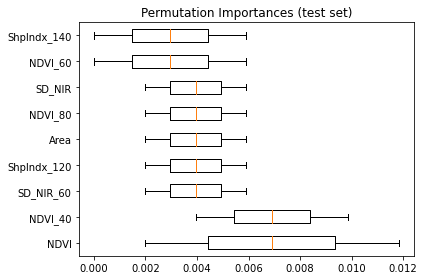

In [ ]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

from sklearn.inspection import permutation_importance
result = permutation_importance(best_rfc, data_test, target_test, n_repeats=2, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()
invert_sorted_idx=sorted_idx[::-1][:9]

fig, ax = plt.subplots()
ax.boxplot(result.importances[invert_sorted_idx].T,
           vert=False, labels=data_test.columns[invert_sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [ ]:
##----- Write your answer here -----##
## COMMENT

"""

In the plot above, we see the distribution of the importance of each feature in the test data for this particular model. 
The closer the value to 0, the less important it is to the predictive power of this model. As seen in the diagram above, 
the NDVI_40 and NDVI features have the strongest feature importance. These were followed by the SD_NIR_60, ShpIndx_120, 
Area, NDVI_80 and SD_NIR in order of importance. The features with the lowest importance -- NDVI_60 and ShpIndx_140 can 
be left out of the model.

"""

'\n\nIn the plot above, we see the distribution of the importance of each feature in the test data for this particular model. \nThe closer the value to 0, the less important it is to the predictive power of this model. As seen in the diagram above, \nthe NDVI_40 and NDVI features have the strongest feature importance. These were followed by the SD_NIR_60, ShpIndx_120, \nArea, NDVI_80 and SD_NIR in order of importance. The features with the lowest importance -- NDVI_60 and ShpIndx_140 can \nbe left out of the model.\n\n'

## Ex 2: Introduction to regression trees

Here, we consider the dataset named *srbct_data*. It is relative to small round blue cell tumors of childhood. This set is composed of :

- a response factor of length 63, called class, indicating the class of each sample (4 classes in total).
- 2308 predictors. Each predictor represents the expression of one gene. The features are correlated. 

More information about the data are available on https://www.rdocumentation.org/packages/plsgenomics/versions/1.5-2/topics/SRBCT 

The table named *genes_name* contains the names of the genes and a description for each gene.

In [ ]:
# (1) Load the data and display the dimension and a brief statistics summary
import pandas as pd # data analysis
srbct_data = pd.read_csv("cancer_data.csv")
genes_name = pd.read_csv("cancer_data_genes_names.csv")
srbct_data.sample(10)

,class,21652,25725,26184,22260,22293,22493,23019,23132,24145,...,809513,504207,810448,810402,782503,795277,809383,809815,810483,503033
58,RMS,2.2313,1.9247,0.2943,0.1762,0.3855,5.3998,7.1398,1.2459,1.3112,...,1.3447,0.4759,0.1446,0.6068,0.2573,0.2658,0.2081,0.4030,0.8022,0.2221
56,RMS,3.1013,0.3910,0.3937,0.2905,0.1113,5.6969,5.4799,1.5380,0.7630,...,0.9912,0.4787,0.1829,0.5891,0.3555,0.0992,0.1863,0.0430,0.6427,0.1345
17,EWS,1.0786,0.1775,2.3458,1.3135,0.1586,1.3881,3.4946,2.1629,1.0314,...,0.8184,1.0637,0.1029,0.9614,1.4460,0.0768,0.1873,0.3389,0.3809,0.1593
14,EWS,0.9190,0.1921,0.7856,0.0564,0.4109,0.9729,3.1877,1.0158,1.2116,...,0.4984,1.0253,0.3465,0.6678,0.5073,0.0529,0.0648,0.1401,0.4467,0.3200
16,EWS,2.6264,0.0925,1.8688,0.1753,0.4294,2.5849,2.9856,2.2699,0.7523,...,1.2966,1.4292,0.1506,1.2906,1.1774,0.3599,0.1252,0.3238,1.3931,0.1131
28,BL,0.3493,0.0557,1.8981,0.1243,0.3372,2.0050,4.5251,2.2200,1.4484,...,0.2627,0.7435,0.1737,0.2704,0.0523,0.0511,0.0957,0.2683,0.7329,0.1281
13,EWS,1.0694,0.1971,1.6814,1.2690,0.2472,1.1489,6.2046,0.7368,0.9485,...,0.1594,1.0321,0.1803,0.4811,1.4633,0.0473,0.7787,0.6942,0.1395,0.2413
9,EWS,1.9291,0.2520,0.5745,0.1356,0.3363,2.5935,7.4107,1.3556,1.7671,...,0.9267,0.5855,0.1556,0.3241,0.3742,0.3516,0.3112,0.2654,0.6044,0.2685
36,NB,1.3452,0.1268,3.1923,1.5470,0.1024,0.6740,4.1266,0.7132,2.7042,...,0.4359,0.6606,0.5444,1.2812,0.5593,0.5613,0.1282,0.2405,0.7038,0.0837
10,EWS,3.6165,0.1056,0.5833,0.2796,0.4452,3.0399,4.2294,2.6029,0.9984,...,0.8703,0.4944,0.0908,0.3546,2.1005,0.2046,0.6153,0.2584,0.8105,0.6007


In [ ]:
genes_name.head()

,Image.Id.,Gene.Description
0,21652.0,"catenin (cadherin-associated protein), alpha 1..."
1,25725.0,farnesyl-diphosphate farnesyltransferase 1
2,26184.0,"phosphofructokinase, platelet"
3,22260.0,cytochrome c-1
4,22293.0,uroporphyrinogen III synthase (congenital eryt...


In [ ]:
# (2) Select the variables that we be used 
target_name = "class" # The response variable that we will consider
features_names = list(srbct_data)
features_names.remove('class') # The predictors/features used to predict the target
#print(target_column)
#print(features_columns)

In [ ]:
# (3) Split the dataset into train and test dataset
from sklearn.model_selection import train_test_split
X, y = srbct_data[features_names], srbct_data[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.25)

In [ ]:
print('The shape of our input data is: ', srbct_data.shape)
print('The shape of our training set is: ', X_train.shape)
print('The shape of our test set is: ', X_test.shape)

The shape of our input data is:  (63, 2309)
The shape of our training set is:  (47, 2308)
The shape of our test set is:  (16, 2308)


In this SRBCT: Gene expression data from Khan et al. (2001), we see a high-dimensional data, with a large set of features but few data input. In the following code cells, we will build Random Forest Models to predict the classes of Small Round Blue Cell Tumors of Childhood cancer in 63 patients. 

**Questions:**
 - 1) Build a random forest on this dataset using the default values for the RF parameters and all the features.
 - 2) Calibrate the two parameters ($n\_estimators$ and $max\_features$) using an approach based on either the oob error or cross validation.
 - 3) Build a second random forest using the calibrated values for the two parameters.
 - 4) Because there are lots of features and they are correlated, use the variable importance score to select a small subset of variables. Justify your choice.
 - 5) Build a third random forest based only the selected subset of features.
 - 6) Compare all these models with a logistic regression.

Build a Random Forest 

In [ ]:
##---- Write your answer ----##
# ---1. Build a random forest classifier on the gene expression data
srbct_rfc = RandomForestClassifier(random_state=0)
srbct_rfc.fit(X_train, y_train)

srbct_rfc.score(X_test, y_test)

1.0

In [ ]:
 #---2. Calibrate ~n_estimator~ and ~max_features~ using Cross validation

parameters = {
    'n_estimators': np.arange(200, 1001, 200),
    'max_features': np.linspace(0, 1, 10)
    } #-- parameters to tune

# Use GridSearch Cross Validation technique to search through the specified hyperparameters

clf = GridSearchCV(
    srbct_rfc,
    parameters, 
    cv = 5, 
    n_jobs = -1
)
predictions_cancer = clf.fit(X_train, y_train)

#clf.best_estimator_
# ---3. 

In [ ]:
optimal_cancer_rfc = predictions_cancer.best_estimator_

In [ ]:
optimal_cancer_rfc

RandomForestClassifier(max_features=0.1111111111111111, n_estimators=200,
                       random_state=0)

According the output of the Grid Search Cross Validation, the optimal n_estimators and max_features are 200 and 0.111, respectively. 

In [ ]:
optimal_cancer_rfc.score(X_test, y_test)

1.0

The accuracy of our optimal model shows a high dependence of the model on the data as it reaches a 100% accuracy on our test set. 
While this might look like a way to go solution, it is a suspicous score as it might indicate an overfitted model, that is one that 
is overly dependent on the training data. However, another potential issue could be the small training dataset that we were provided 
with and the large space of features. To bulwark this roadblock in selecting our model, we take on an approach for variable selection,
which is known as the Feature Importance. The feature importance technique evaluates the relationship between each of the features 
used for training the model and the target class, thereby indicating how much the model depends on the feature. 

In the code blocks that follow, we will implement the Permutation feature importance, which shows how important a feature is for a p
articular model.

In [ ]:
# ---4. Variable importance score to select a small subset of variables
from sklearn.inspection import permutation_importance
result = permutation_importance(optimal_cancer_rfc, X_test, y_test, n_repeats=2, random_state=0, n_jobs=2)

sorted_idx = result.importances_mean.argsort()
invert_sorted_idx=sorted_idx[::-1][:2308]


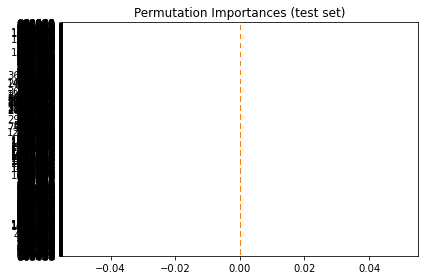

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(result.importances[invert_sorted_idx].T,
           vert=False, labels=X_test.columns[invert_sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

The output of our Permutation feature importance shows that our features are equally important for this model. This also, as in the case of an accuracy of 100%, is a suspicous outcome. The direction of suspicion goes to the nature of the data, which has very few data points but large number of features. Typically, datasets with large feature space like this one usually have multi-collinear features. When a model is provided with multicollinear
feature space, the model still have access to each of these collinear data point through each other and as such reduce the importance of these features, whereas they could be important. This is case observed in our Permutation Feature Importance shown above, where the permutation importance shows that none of the features are important.
To handle this challenge of multicollinearity, we perform an hierarchical clustering on the features Spearman rank-order correlations and with a specified threshold kepp a single feature from each cluster. See the code blocks below: 

In [ ]:
from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

corr =  spearmanr(srbct_data).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

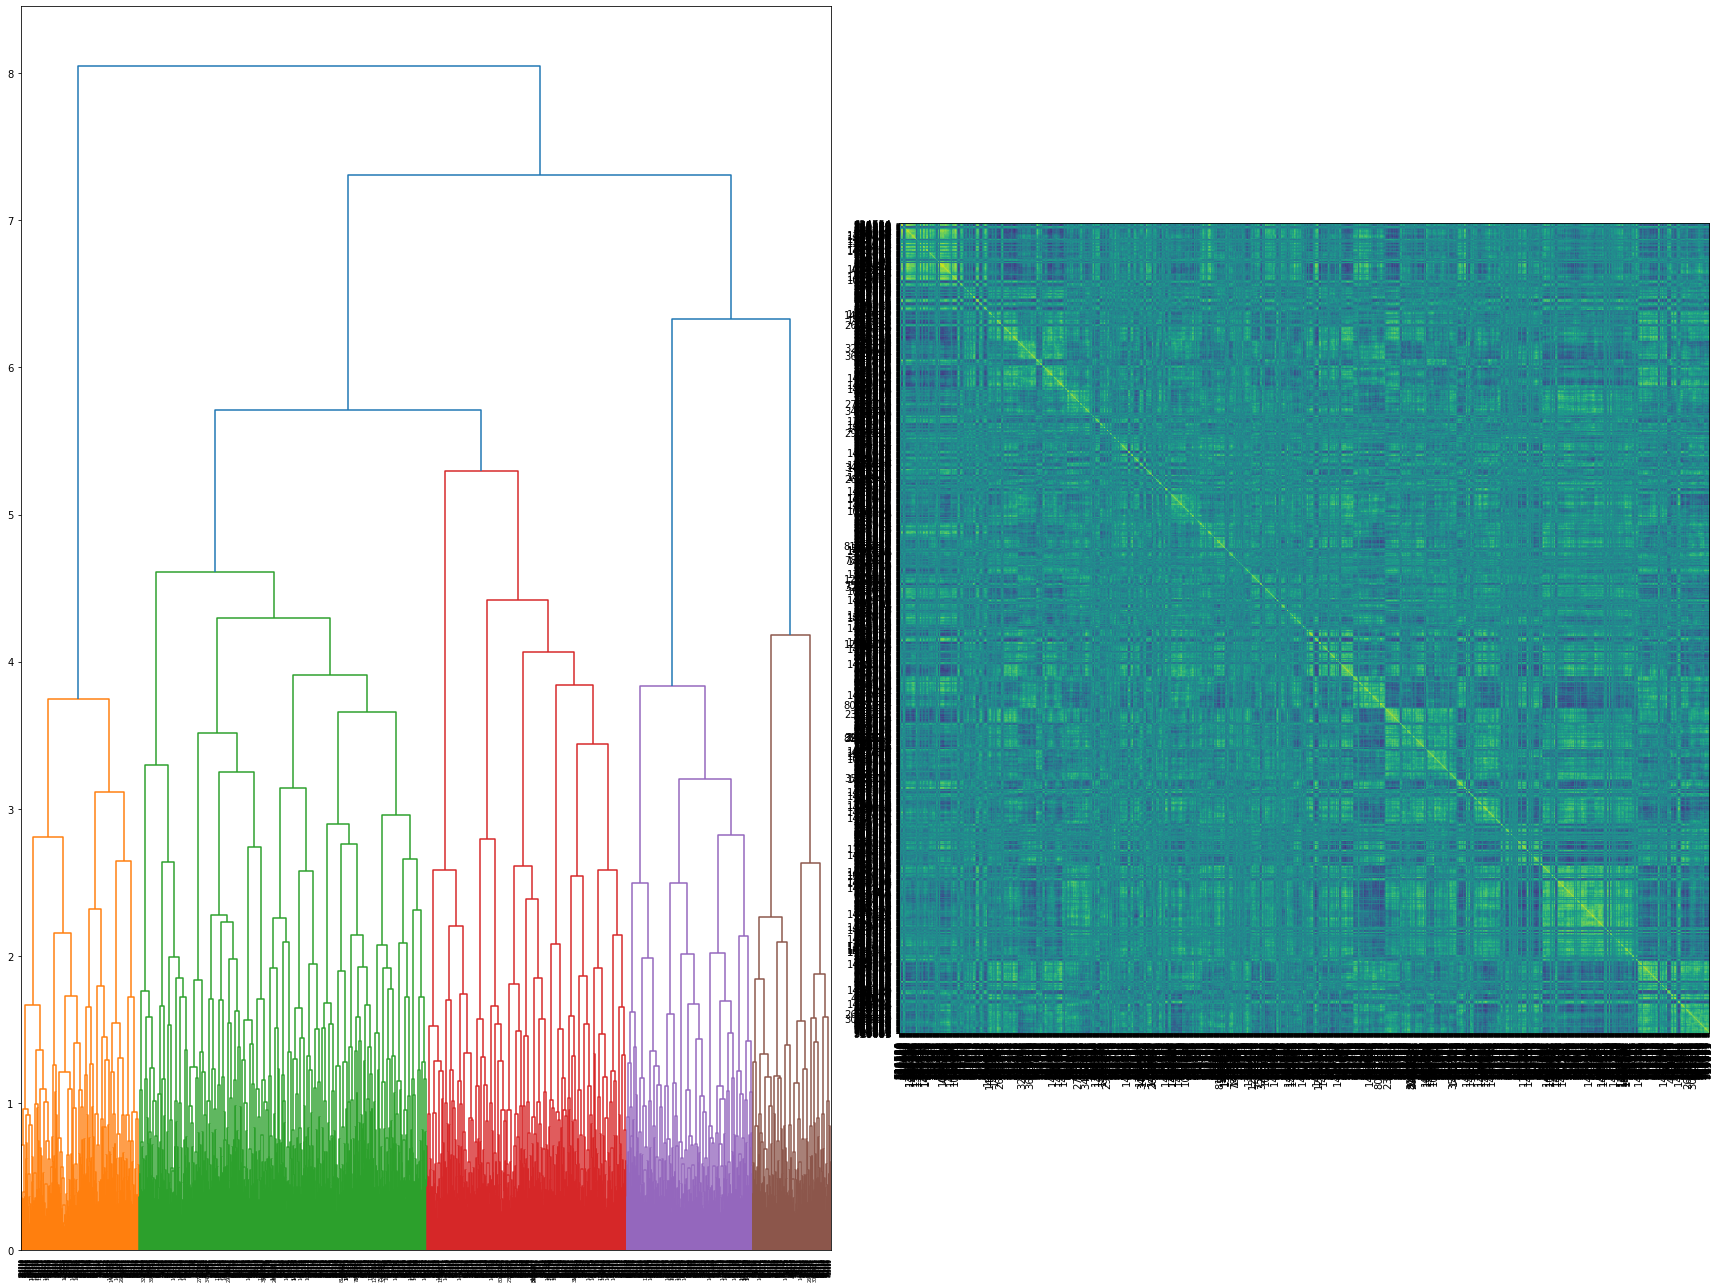

In [ ]:
# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 18))
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=srbct_data.columns.tolist(), ax=ax1, leaf_rotation=90
)

dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()

In [ ]:
# Set the threshold to pick the hierarchical clusters in the feature space

from collections import defaultdict

cluster_ids = hierarchy.fcluster(dist_linkage, 4, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)

for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

print('From our hierarchical clusters, we selected ', len(selected_features), 'features')

From our hierarchical clusters, we selected  11 features


In [ ]:
# extract these features from main data
X = srbct_data.iloc[:, selected_features]

# select these features from your train and test sets
X_train_sel = X_train.iloc[:, selected_features]
X_test_sel = X_test.iloc[:, selected_features]

In [ ]:
# Build a Random Forest Classifier and fit it to this new data. 

clf_sel = RandomForestClassifier(n_estimators=200, random_state=0)
clf_sel.fit(X_train_sel, y_train)

# compute accuracy
print(
    "Random Forest accuracy on selected test data: {:.2f}".format(
        clf_sel.score(X_test_sel, y_test)
    )
)

Random Forest accuracy on selected test data: 0.50


From the dendogram it is evident that in the range 0 to 4, the variables are highly correlated(dense network of correlation). Thus, for clustering the threshold can be taken as 4, as above it the variable are not highly correlated.

### Compare all the RandomForest Models with a Logistic Regression

In [ ]:
# Build the Logistic Regression model

from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(penalty = 'elasticnet', solver = 'saga', random_state = RANDOM_STATE, l1_ratio=0.5)
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

print("Accuracy of Logistic Model", log_clf.score(X_test, y_test))

Accuracy of Logistic Model 0.9375


C:\Users\rufai\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Compare the Performance of Logistic Regression to oother models. 



In [ ]:
# compare accuracy of logistic regression with 

# Max Depth, Max_Feature Random Forest
print('Accuracy of our model with default parameters: ', srbct_rfc.score(X_test, y_test) )

# Optimized model
print('Accuracy of our model with optimized hyperparameters: ', optimal_cancer_rfc.score(X_test, y_test) )

# Parameter Selection model
print('Accuracy of our model with important features: ', clf_sel.score(X_test_sel, y_test) )

# Logistic regression model
print("Accuracy of Logistic regression model: ", log_clf.score(X_test, y_test))

Accuracy of our model with default parameters:  1.0
Accuracy of our model with optimized hyperparameters:  1.0
Accuracy of our model with important features:  0.5
Accuracy of Logistic regression model:  0.9375


As seen in the comparative evaluation of our model, we can tell that the Random Forest model overfits our data for both the models with default parameters and the ones with optimized parameters. Due to the high-dimensionality of the feature space, cutting the trees and using lesser features per tree could have led to better model performance. But overall, we see that when provided with high-dimensional data, a regularized linear model such as the ElasticNet Regularized Model perform better.